# PA004 - HEALTH INSURANCE CROS-SELL

Last version of project, according Machine Learning Fundamentals course

## 0 - IMPORTS AND FUNCTIONS

In [1]:
import warnings

import scikitplot                                             as skplt
import matplotlib.patches                                     as mpatches
import matplotlib.pyplot                                      as plt
import numpy                                                  as np
import plotly.express                                         as px
import pandas                                                 as pd
import seaborn                                                as sns

from IPython.core.display    import HTML
from IPython.display         import Image

warnings.filterwarnings( 'ignore' )

### 0.1 - HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 24
    sns.set(font_scale=2)
    display( HTML( '<style>.container {width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1 - LOADING AND UNDESTANDING DATA

In [4]:
# All data - Linux
#df = pd.read_csv('/home/reng/Documents/ds_repos/Projects/Health_Insurance_Cross_Sell/data/raw/data.csv')

# All Data - Windows
df = pd.read_csv('C:/Users/perot/Documents/ds_repos/projects/Health_Insurance_Cross_Sell/data/raw/data.csv') 

### 1.2 - DATA DESCRIPTION

In [33]:
df1 = df.copy()

In [7]:
# Data Dimensions
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Numfer of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 381109
Numfer of Cols: 12


In [8]:
# Data Types
df1.dtypes

id                       int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
dtype: object

In [9]:
# Check NAN Values
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

### 1.3 - DATA DESCRIPTIVE

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   gender                381109 non-null  object
 2   age                   381109 non-null  int64 
 3   region_code           381109 non-null  int64 
 4   policy_sales_channel  381109 non-null  int64 
 5   driving_license       381109 non-null  int64 
 6   vehicle_age           381109 non-null  object
 7   vehicle_damage        381109 non-null  object
 8   previously_insured    381109 non-null  int64 
 9   annual_premium        381109 non-null  int64 
 10  vintage               381109 non-null  int64 
 11  response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [11]:
df1.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11,152,1,< 1 Year,Yes,0,23367,249,0
1,13,Female,41,15,14,1,1-2 Year,No,1,31409,221,0
2,18,Female,25,35,152,1,< 1 Year,No,1,46622,299,0
3,31,Female,26,8,160,1,< 1 Year,No,0,2630,136,0
4,39,Male,45,8,124,1,1-2 Year,Yes,0,42297,264,0


In [12]:
# Select columns where the content is different 0 or 1.
num_attributes = df1[['age','annual_premium','vintage']]
cat_attributes = df1[['driving_license','region_code','policy_sales_channel','previously_insured','gender','vehicle_age','vehicle_damage']]

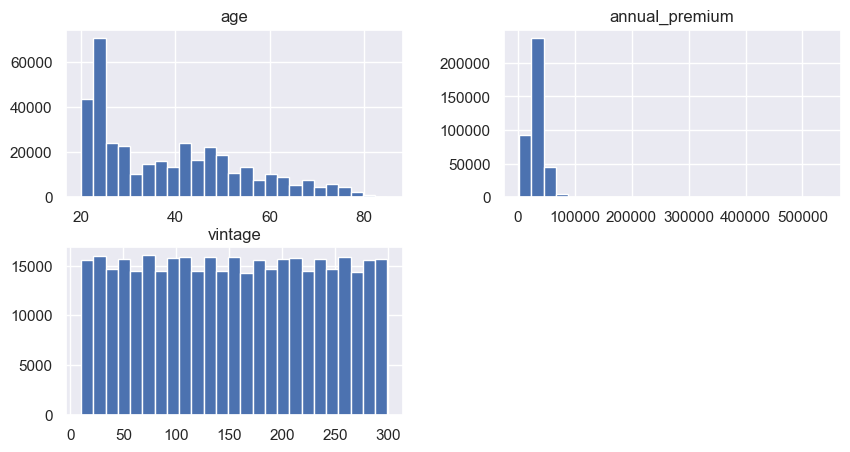

In [13]:
num_attributes.hist(bins=25, figsize= (10, 5));

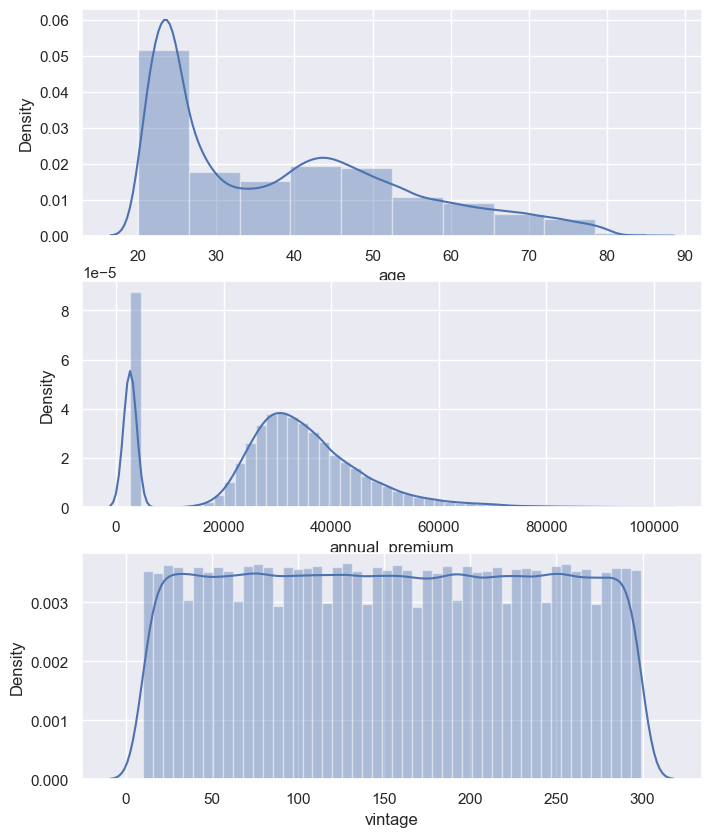

In [14]:
# Looking at the distribuition of the following variables.
fig, axs = plt.subplots(3, figsize = (8, 10))
sns.distplot(df1['age'], ax=axs[0], bins=10)
sns.distplot(df1[df1['annual_premium']<100000]['annual_premium'], ax=axs[1])
sns.distplot(df1['vintage'], ax=axs[2]);

In [19]:
# Robust Scaller
from sklearn.preprocessing import RobustScaler

In [20]:
rb = RobustScaler()

In [34]:
df1['annual_premium'] = rb.fit_transform( df1[['annual_premium']].values )

In [35]:
df1['annual_premium'] = numpy.log1p(df1['annual_premium'])

<AxesSubplot: xlabel='annual_premium', ylabel='Density'>

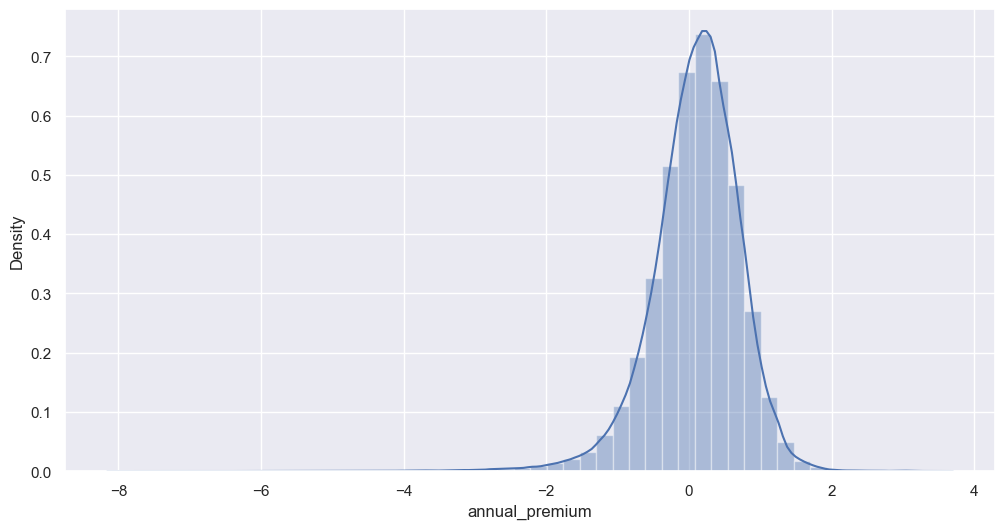

In [36]:
sns.distplot(df1['annual_premium'])

<AxesSubplot: xlabel='region_code', ylabel='count'>

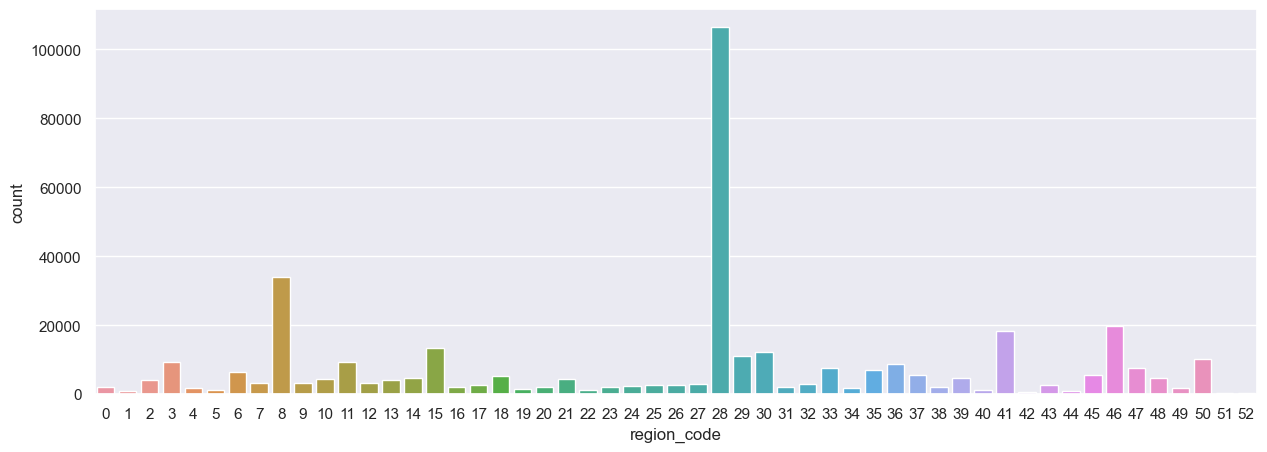

In [16]:
fig = plt.subplots(figsize = (15,5))
sns.countplot(x='region_code', data=df1)

<AxesSubplot: xlabel='policy_sales_channel', ylabel='index'>

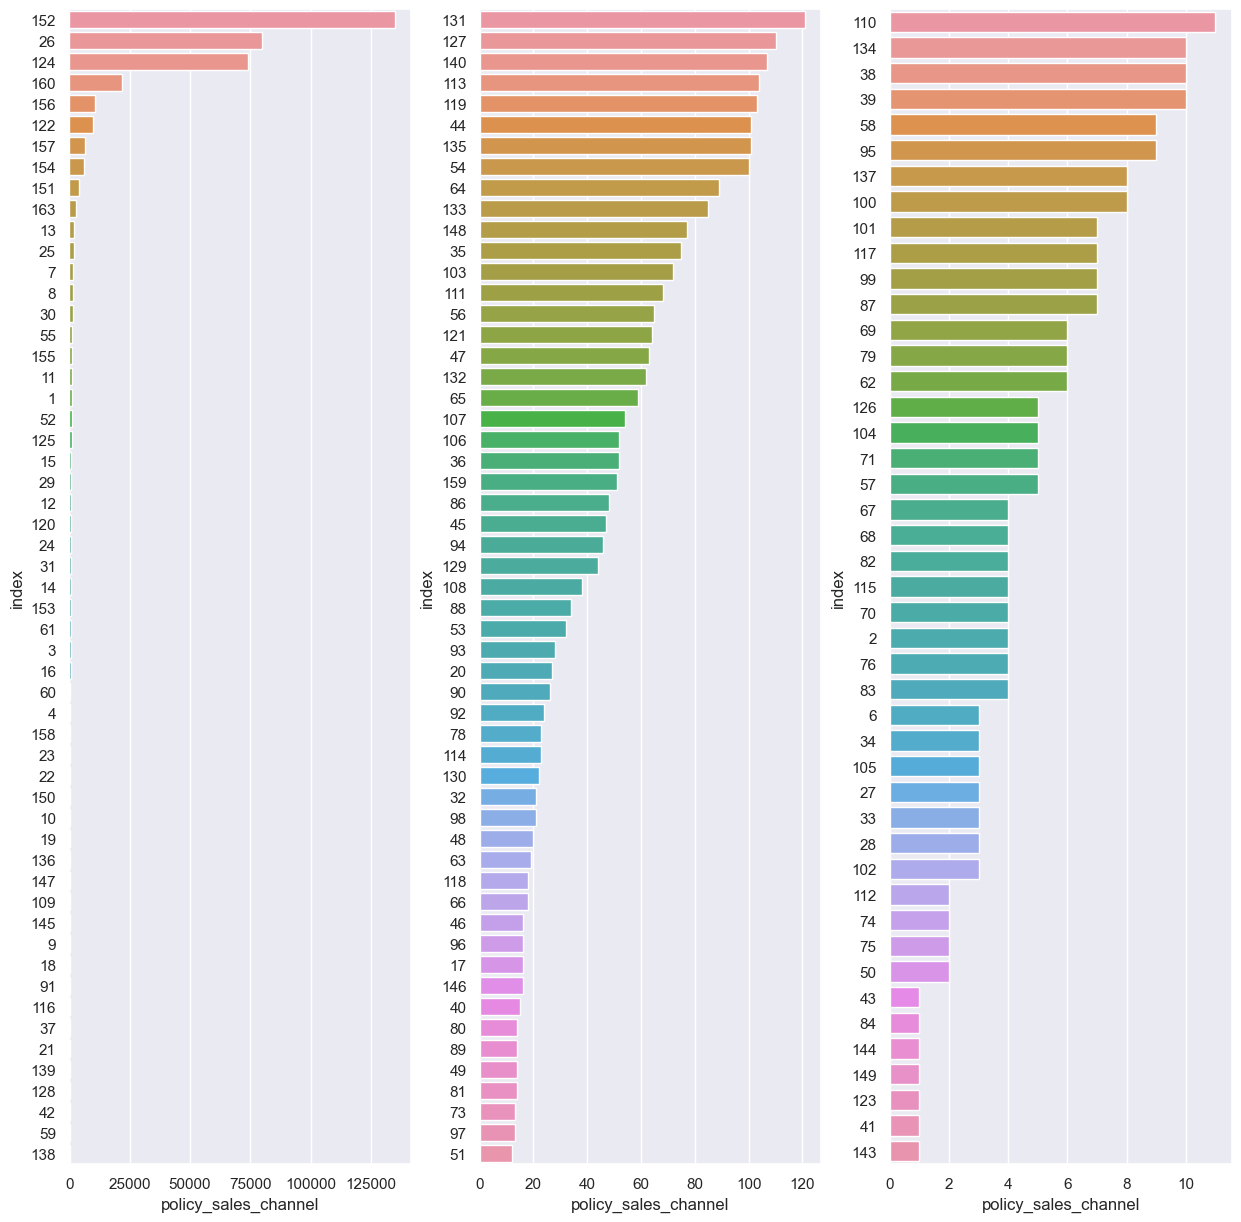

In [17]:
policy_1 = df1['policy_sales_channel'].value_counts().iloc[0:55]
policy_1 = policy_1.reset_index()
policy_2 = df1['policy_sales_channel'].value_counts().iloc[55:110]
policy_2 = policy_2.reset_index()
policy_3 = df1['policy_sales_channel'].value_counts().iloc[110:156]
policy_3 = policy_3.reset_index()

fig, axs = plt.subplots(ncols=3, figsize=(15,15))
sns.barplot(y='index', x='policy_sales_channel', data=policy_1, ax=axs[0], orient='h', order=policy_1['index'])
sns.barplot(y='index', x='policy_sales_channel', data=policy_2, ax=axs[1], orient='h', order=policy_2['index'])
sns.barplot(y='index', x='policy_sales_channel', data=policy_3, ax=axs[2], orient='h', order=policy_3['index'])

## 2 - FEATURE ENGINEERING

In [ ]:
df2 = df1.copy()

In [ ]:
# Changing data types
df2['region_code'] = df2['region_code'].astype(object)
df2['policy_sales_channel'] = df2['policy_sales_channel'].astype(object)

In [ ]:
# Fitting vehicle_age column
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 1 if (x == '< 1 Year') else 2 if (x == '1-2 Year') else 3)

# Fitting vehicle_damage column
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if (x == 'Yes') else 0)